In [1]:
from index_model_scoring import index_model_scoring, stress_test_models

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
linear_model_data = {
    "model": "linear_index_regression",
    "stock_code": "GOOGL",
    "modelOptions": {},
    "inputOptions": {
        "config": [
            {"type": "index_price", "n": 10}
        ],
        "stock_codes": ["GOOGL"],
        "stock_code": "GOOGL",
        "column": "adjusted_close"
    }
}

svr_model_data = {
    "model": "svr_index_regression",
    "stock_code": "GOOGL",
    "modelOptions": {
        "use_stock_price": False,
        "n": 30,
        "kernel": "rbf",
        "degree": 3,
        "gamma": "auto",
        "coef0": 0.0,
        "tol": 0.001,
        "C": 1.0,
        "epsilon": 0.1,
        "shrinking": True,
        "cache_size": 500.0,
        "verbose": False,
        "max_iter": -1
    },
    "inputOptions": {
        "config": [
            {"type": "index_price", "n": 10}
        ],
        "stock_codes": ["GOOGL"],
        "stock_code": "GOOGL",
        "column": "adjusted_close"
    }
}

/Users/micckwong/Documents/GitHub/FYP/FYP-AI/env/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


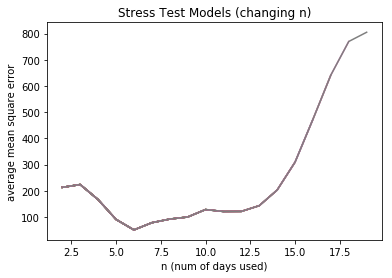

In [4]:
x = []
y = []

for i in range(2,20,1): #loop from 2 to 10
    linear_model_data["inputOptions"]["config"][0]["n"] = i #set the parameter you want to change for doing the stress_test
    error = index_model_scoring(linear_model_data)
    x.append(i)
    y.append(error)
    plt.plot(x,y, label='linear_index_regression')
    plt.xlabel('n (num of days used)')
    plt.ylabel('average mean square error')
    plt.title('Stress Test Models (changing n)')

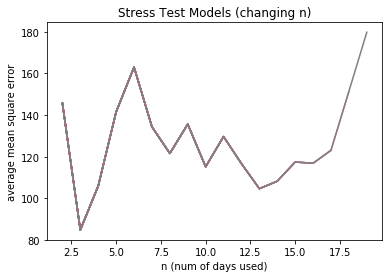

In [5]:
x = []
y = []

for i in range(2,20,1): #loop from 2 to 10
    svr_model_data["inputOptions"]["config"][0]["n"] = i #set the parameter you want to change for doing the stress_test
    error = index_model_scoring(svr_model_data)
    x.append(i)
    y.append(error)
    plt.plot(x,y, label='svr_index_regression')
    plt.xlabel('n (num of days used)')
    plt.ylabel('average mean square error')
    plt.title('Stress Test Models (changing n)')